# Preliminary results

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# import re
# import random

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [28]:
project_root_path = os.path.join('..', '..')
experiment_path = os.path.join(project_root_path, 'experiments', 'preliminary')
results_path = os.path.join(experiment_path, 'results')
figures_path = os.path.join(experiment_path, 'figures')

In [5]:
def load_results(csv_file):
    return pd.read_csv(csv_file, index_col=0)

result_files = [file for file in os.listdir(results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(result_files)}')

Number of result files: 8


In [7]:
# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, curr_df], ignore_index=True)
df

100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00, 84.56it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Slopes,Existence,Confusion matrix,Anomaly Coordinates time,...,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time,Anomalies coordinates time
0,Daphnet/S03R03E4.test.csv@3.out,9599,1,268.000000,100.0,1.0,precomputed,optimized,dynamic,0.000018,...,0.000320,0.000484,0.000397,0.001443,0.000090,0.000049,FF-VUS-PR,0.027465,0.003890,NaN
1,Daphnet/S09R01E4.test.csv@3.out,9599,1,268.000000,100.0,1.0,precomputed,optimized,dynamic,0.000021,...,0.000349,0.000470,0.000108,0.000572,0.000088,0.000034,FF-VUS-PR,0.267677,0.002693,NaN
2,Daphnet/S03R02E0.test.csv@4.out,16639,6,384.333333,100.0,1.0,precomputed,optimized,dynamic,0.000022,...,0.000824,0.000774,0.000469,0.001941,0.000060,0.000039,FF-VUS-PR,0.094646,0.006428,NaN
3,Daphnet/S09R01E4.test.csv@6.out,9599,1,268.000000,100.0,1.0,precomputed,optimized,dynamic,0.000016,...,0.000347,0.000303,0.000102,0.000572,0.000079,0.000035,FF-VUS-PR,0.044684,0.002693,NaN
4,Daphnet/S03R02E0.test.csv@3.out,16639,6,384.333333,100.0,1.0,precomputed,optimized,dynamic,0.000023,...,0.000799,0.000661,0.000518,0.002075,0.000060,0.000038,FF-VUS-PR,0.126675,0.006421,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15067,KDD21/026_UCR_Anomaly_DISTORTEDInternalBleedin...,7600,1,170.000000,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RANGE-AUC-PR,0.296229,0.003978,NaN
15068,KDD21/170_UCR_Anomaly_gaitHunt1_18500_33070_33...,63999,1,110.000000,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RANGE-AUC-PR,0.180186,0.028085,NaN
15069,KDD21/223_UCR_Anomaly_mit14046longtermecg_7412...,180385,1,500.000000,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RANGE-AUC-PR,0.001887,0.077370,NaN
15070,KDD21/213_UCR_Anomaly_STAFFIIIDatabase_33211_1...,299999,1,450.000000,100.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RANGE-AUC-PR,0.043394,0.128334,NaN


## Figures

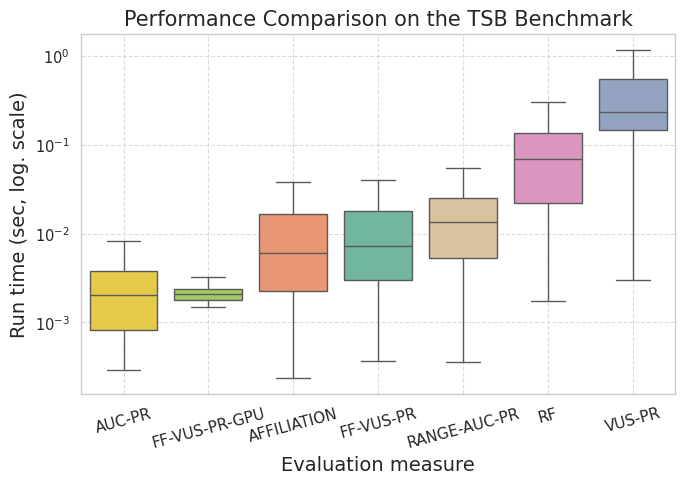

In [86]:
# Sort metrics by median execution time (ascending)
median_times = df.groupby("Metric")["Metric time"].median().sort_values()
ordered_metrics = median_times.index.tolist()

# Create boxplot
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")  # clean background with grid
sns.boxplot(
    x='Metric',
    hue='Metric',
    y='Metric time', 
    data=df, 
    order=ordered_metrics, 
    showfliers=False,
    palette="Set2",
)

plt.title('Performance Comparison on the TSB Benchmark', fontsize=15)
plt.yscale('log')
plt.xlabel('Evaluation measure', fontsize=14)
plt.ylabel('Run time (sec, log. scale)', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=15, fontsize=11)
plt.tight_layout()
plt.savefig(os.path.join(figures_path, 'metrics_exec_time.svg'), bbox_inches='tight')
plt.show()

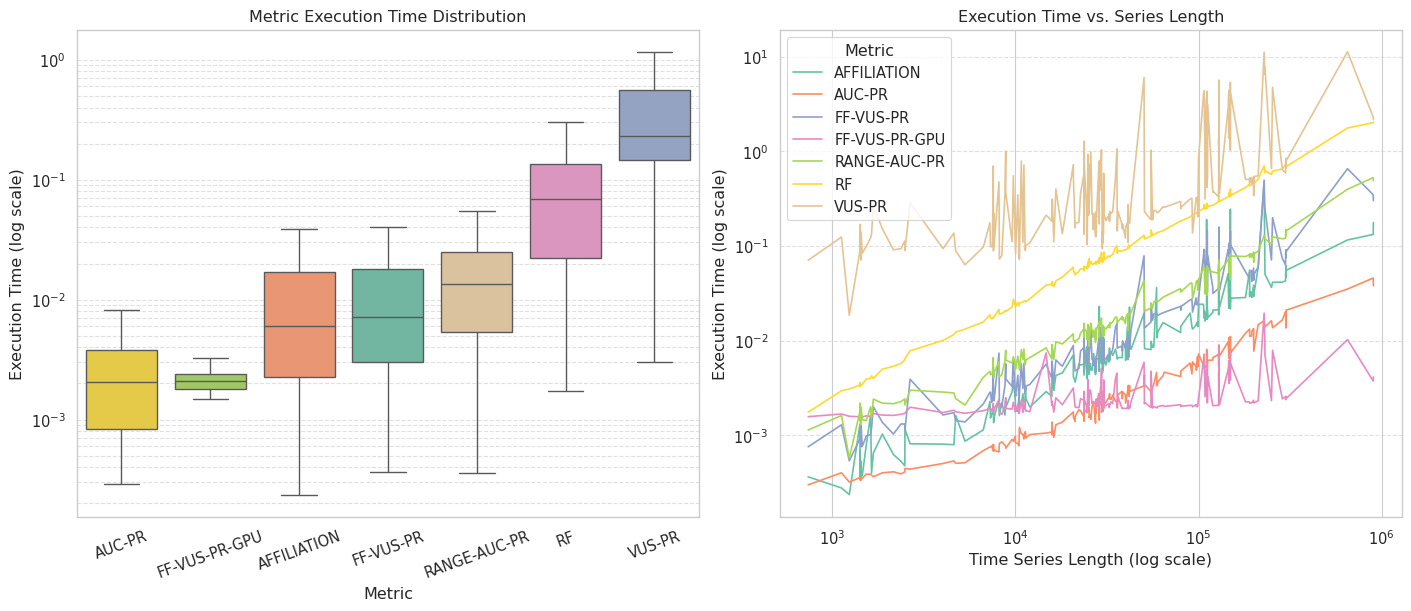

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure consistent style
sns.set(style="whitegrid", context="paper", font_scale=1.2)

# Sort metrics by median time for plot (from fastest to slowest)
median_times = df.groupby('Metric')['Metric time'].median().sort_values()
ordered_metrics = median_times.index.tolist()

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# --- Boxplot ---
sns.boxplot(
    ax=axes[0],
    x='Metric',
    hue='Metric',
    y='Metric time',
    data=df,
    order=ordered_metrics,
    showfliers=False,
    palette="Set2"
)
axes[0].set_yscale('log')
axes[0].set_title('Metric Execution Time Distribution')
axes[0].set_xlabel('Metric')
axes[0].set_ylabel('Execution Time (log scale)')
axes[0].tick_params(axis='x', rotation=20)
axes[0].grid(True, which="both", axis="y", linestyle='--', alpha=0.6)

# --- Lineplot ---
# Aggregate metric time per Metric and Length
agg_df = df.groupby(['Metric', 'Length'])['Metric time'].median().reset_index()

sns.lineplot(
    ax=axes[1],
    x='Length',
    y='Metric time',
    hue='Metric',
    data=agg_df,
    # marker='o',
    palette="Set2"
)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_title('Execution Time vs. Series Length')
axes[1].set_xlabel('Time Series Length (log scale)')
axes[1].set_ylabel('Execution Time (log scale)')
axes[1].grid(axis='y', which="major", linestyle='--', alpha=0.6)
axes[1].legend(title="Metric", loc='upper left', frameon=True)

# Save or show
# plt.tight_layout()
plt.show()

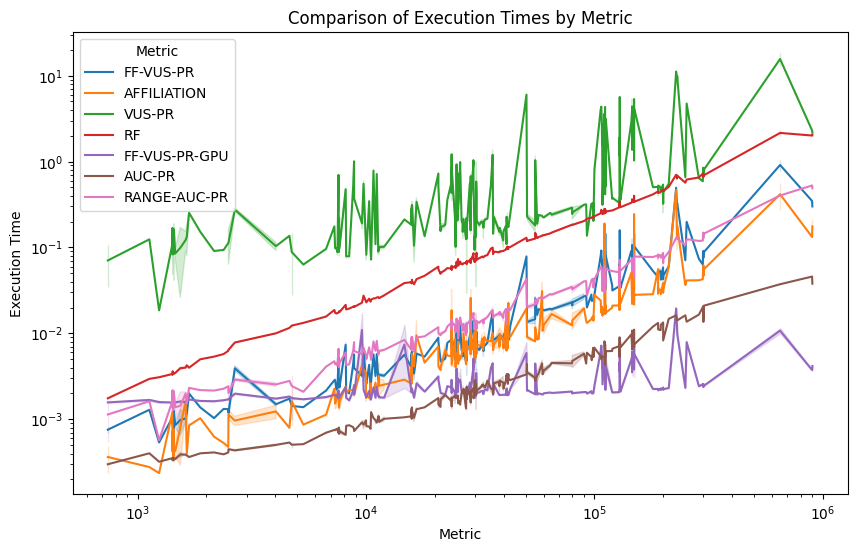

In [25]:
# Create lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Length', y='Metric time', hue='Metric', data=df, errorbar=("se", 1))
plt.yscale('log')
plt.xscale('log')
plt.title('Comparison of Execution Times by Metric')
plt.xlabel('Metric')
plt.ylabel('Execution Time')
plt.show()

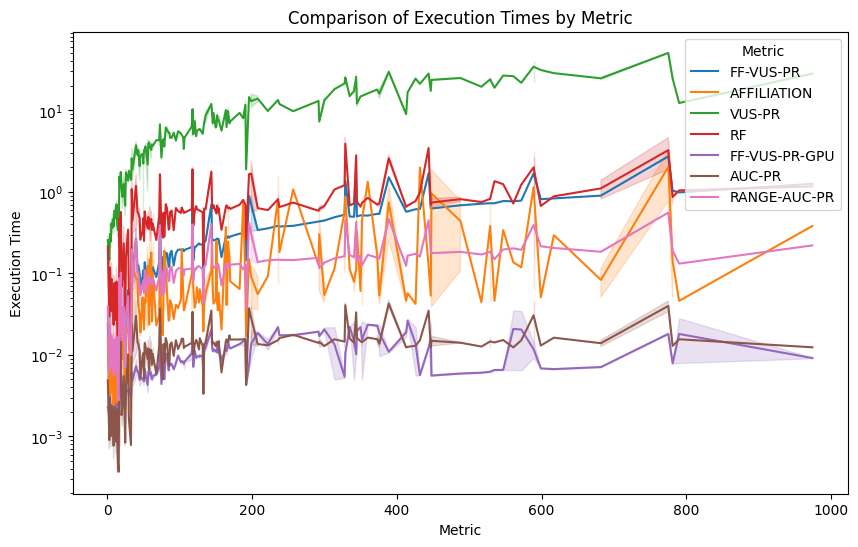

In [19]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of anomalies', y='Metric time', hue='Metric', data=df)
plt.yscale('log')
plt.title('Comparison of Execution Times by Metric')
plt.xlabel('Metric')
plt.ylabel('Execution Time')
plt.show()

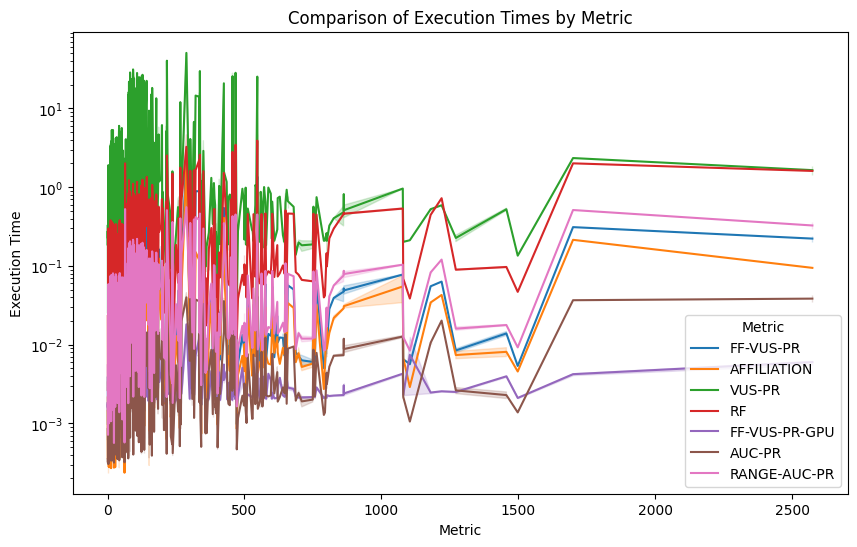

In [18]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Anomalies average length', y='Metric time', hue='Metric', data=df)
plt.yscale('log')
plt.title('Comparison of Execution Times by Metric')
plt.xlabel('Metric')
plt.ylabel('Execution Time')
plt.show()